<a href="https://colab.research.google.com/github/drissdunn/PP22-W607/blob/main/W706.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality in Madrid (2001-2018)

In [53]:
#important library
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
# loading all csv file names
files = glob.glob("csvs_per_year/*.csv")

In [4]:
# reading csv files
for index,file in enumerate(files):
    files[index] = pd.read_csv(file,index_col='date',parse_dates=['date'])

In [5]:
# merging all csv files
df = pd.concat(files)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808224 entries, 2001-08-01 01:00:00 to 2018-02-01 00:00:00
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   BEN      float64
 1   CO       float64
 2   EBE      float64
 3   MXY      float64
 4   NMHC     float64
 5   NO_2     float64
 6   NOx      float64
 7   OXY      float64
 8   O_3      float64
 9   PM10     float64
 10  PXY      float64
 11  SO_2     float64
 12  TCH      float64
 13  TOL      float64
 14  station  int64  
 15  PM25     float64
 16  NO       float64
 17  CH4      float64
dtypes: float64(17), int64(1)
memory usage: 552.0 MB


In [7]:
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [8]:
df.tail()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2018-02-01,NaN,0.5,NaN,NaN,NaN,91.0,192.0,NaN,1.0,35.0,NaN,NaN,NaN,NaN,28079056,22.0,66.0,NaN
2018-02-01,NaN,0.7,NaN,NaN,NaN,107.0,241.0,NaN,NaN,29.0,NaN,15.0,NaN,NaN,28079057,NaN,87.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,48.0,91.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058,NaN,28.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,103.0,320.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079059,NaN,141.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,96.0,202.0,NaN,3.0,26.0,NaN,NaN,NaN,NaN,28079060,NaN,69.0,NaN


In [9]:
descr= df.describe()
descr

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
count,1.041684e+06,2.651012e+06,1.001724e+06,315415.000000,1.085312e+06,3.787050e+06,2.376275e+06,315695.000000,2.991732e+06,2.861255e+06,315584.000000,2.775960e+06,1.086441e+06,1.038929e+06,3.808224e+06,816424.000000,1.532397e+06,14850.000000
mean,1.257431e+00,5.503838e-01,1.407927e+00,4.650394,1.873865e-01,5.047151e+01,1.093188e+02,2.280912,3.982616e+01,2.893654e+01,2.056178,1.065539e+01,1.435882e+00,5.876842e+00,2.807903e+07,13.738292,2.343886e+01,1.300849
std,1.910831e+00,5.354483e-01,2.146109e+00,5.599223,1.539529e-01,3.455288e+01,1.102871e+02,2.639609,3.039249e+01,2.594859e+01,2.395130,9.121267e+00,2.332228e-01,8.524460e+00,2.028574e+01,11.214146,5.021504e+01,0.195550
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.807900e+07,-31.000000,0.000000e+00,0.020000
25%,2.100000e-01,2.600000e-01,3.500000e-01,1.200000,9.000000e-02,2.400000e+01,4.000000e+01,0.960000,1.271000e+01,1.150000e+01,0.800000,5.840000e+00,1.300000e+00,1.100000e+00,2.807901e+07,6.450000,2.000000e+00,1.170000
50%,6.000000e-01,4.000000e-01,8.800000e-01,2.800000,1.500000e-01,4.400000e+01,7.615000e+01,1.320000,3.486000e+01,2.149000e+01,1.280000,8.150000e+00,1.380000e+00,3.160000e+00,2.807902e+07,11.000000,6.000000e+00,1.250000
75%,1.500000e+00,6.500000e-01,1.580000e+00,5.890000,2.400000e-01,6.958000e+01,1.397000e+02,2.740000,5.999000e+01,3.775000e+01,2.510000,1.230000e+01,1.510000e+00,6.990000e+00,2.807904e+07,17.670000,2.000000e+01,1.400000
max,6.639000e+01,1.804000e+01,1.622000e+02,177.600006,9.070000e+00,6.286000e+02,2.537000e+03,103.000000,2.360000e+02,6.950000e+02,106.000000,1.991000e+02,1.048000e+01,2.429000e+02,2.807910e+07,506.899994,1.146000e+03,3.920000


In [10]:
#summing up missing values in the data set and saving it in 'missing_count'
missing_count = df.isnull().sum()
missing_count_df = pd.DataFrame(missing_count, columns=['missing_values'])
missing_count_df

,missing_values
BEN,2766540
CO,1157212
EBE,2806500
MXY,3492809
NMHC,2722912
NO_2,21174
NOx,1431949
OXY,3492529
O_3,816492
PM10,946969


In [11]:
#Presenting percentage of data points, missing in each feature
string_percentage = []
float_percentage =[]
for key,value in missing_count.items():
    percent_missing = (value/3808224)*100
    float_percentage.append(percent_missing)
    string_percentage.append(str(percent_missing)+'%')
missing_df = pd.DataFrame(index = missing_count.keys(), columns=['Percentage_missing'])
missing_df['Percentage_missing']= string_percentage
missing_df

,Percentage_missing
BEN,72.64646197282512%
CO,30.387183106876066%
EBE,73.69576999672289%
MXY,91.71753027132857%
NMHC,71.50083608527228%
NO_2,0.556007209659936%
NOx,37.60149087868781%
OXY,91.7101777626526%
O_3,21.440230406614738%
PM10,24.866420672733536%


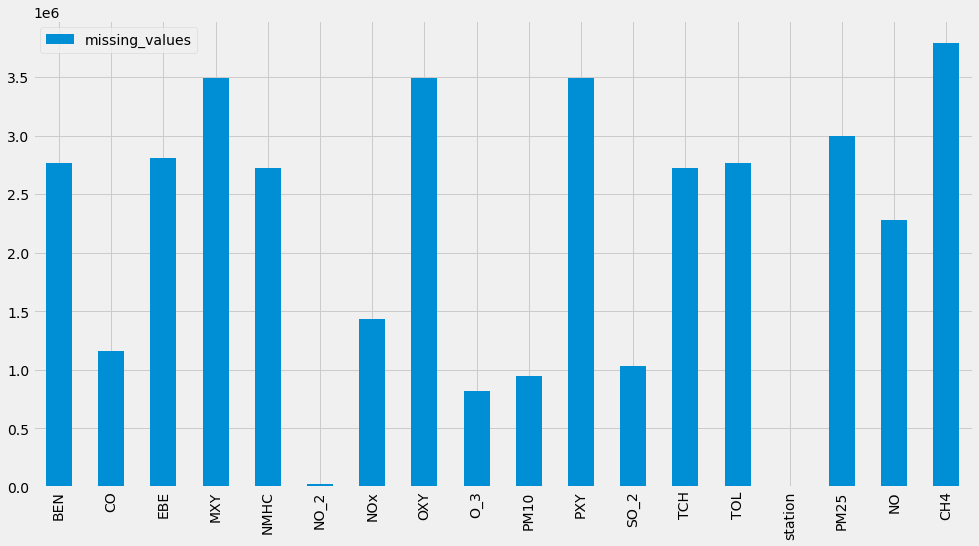

In [12]:
#Plotting the amount of missing data points in the dataset
plt.style.use('fivethirtyeight')
missing_count_df.plot(kind='bar',figsize=(15,8))

In [14]:
#filling missing data with closest data point after 
df_ffill = df.fillna(method='ffill')
#filling missing data with closest data point before
df_bfill = df.fillna(method='bfill')

In [15]:
df_bfill.isnull().sum()

BEN              5
CO               3
EBE              5
MXY        1556880
NMHC             5
NO_2             0
NOx              0
OXY        1556880
O_3              0
PM10             0
PXY        1556880
SO_2             3
TCH              5
TOL              5
station          0
PM25             4
NO               0
CH4              5
dtype: int64

In [16]:
df_drop= df.dropna()
df_drop.shape

(0, 18)

### Inference
<p> We can see that simply replacing the missing values with the nearest datapoints does not completely solve our missing data problem. In addition dropping the rows with missing data causes a total loss of the entire data. we cannot simply replace missing values with random figures like 0 or 1 in other to avoid too great an influence on our data or setting up a kind of data bias.</p>
<p> The following strategy shall be used to handle our missing data;</p>
<ol>
    <li> Features with more than 72% missing data will be dropped. This is because the amount of known data points in these fearures is negligible compared to the amount of missing data. Imputing these values will lead to a huge bias in the data.</li>
    <li> Missing values in other features will be replaced with their median values. This is to preserve the statistical property of each feature as much as possible. Median is used here instead of the mean because the mean can be affected by the presence of outliers </li>
</ol>

In [17]:
#Removing features with more than 72% NAN entries
df_copy = df.copy()
missing_dict = dict(zip(missing_count.keys(),float_percentage))
for key,value in missing_dict.items():
    if value > 72:
        df_copy.drop(key,inplace=True, axis= 1)
df_copy.shape

(3808224, 10)

In [18]:
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [19]:
df_copy.head()

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO
date,,,,,,,,,,
2001-08-01 01:00:00,0.37,NaN,58.400002,87.150002,34.529999,105.000000,6.34,NaN,28079001,NaN
2001-08-01 01:00:00,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,28079035,NaN
2001-08-01 01:00:00,0.28,NaN,50.660000,61.380001,46.310001,100.099998,7.85,NaN,28079003,NaN
2001-08-01 01:00:00,0.47,NaN,69.790001,73.449997,40.650002,69.779999,6.46,NaN,28079004,NaN
2001-08-01 01:00:00,0.39,NaN,22.830000,24.799999,66.309998,75.180000,8.80,NaN,28079039,NaN


In [20]:
df_copy_missing_dict = df_copy.isnull().sum()
df_copy_missing_dict

CO         1157212
NMHC       2722912
NO_2         21174
NOx        1431949
O_3         816492
PM10        946969
SO_2       1032264
TCH        2721783
station          0
NO         2275827
dtype: int64

In [21]:
df_copy_missing_dict.keys()

Index(['CO', 'NMHC', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'TCH', 'station',
       'NO'],
      dtype='object')

In [22]:
#Replacing missing data in each column with the feature's median value and storing in a new variable 'clean_df'
clean_df = df_copy.copy()
for feature in df_copy_missing_dict.keys():
    clean_df[feature].fillna(clean_df[feature].median(),inplace=True)
clean_df.head()

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO
date,,,,,,,,,,
2001-08-01 01:00:00,0.37,0.15,58.400002,87.150002,34.529999,105.000000,6.34,1.38,28079001,6.0
2001-08-01 01:00:00,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,28079035,6.0
2001-08-01 01:00:00,0.28,0.15,50.660000,61.380001,46.310001,100.099998,7.85,1.38,28079003,6.0
2001-08-01 01:00:00,0.47,0.15,69.790001,73.449997,40.650002,69.779999,6.46,1.38,28079004,6.0
2001-08-01 01:00:00,0.39,0.15,22.830000,24.799999,66.309998,75.180000,8.80,1.38,28079039,6.0


In [23]:
#Checking to confirm if missing values have been addressed
clean_df.isnull().sum()

CO         0
NMHC       0
NO_2       0
NOx        0
O_3        0
PM10       0
SO_2       0
TCH        0
station    0
NO         0
dtype: int64

clean_df is the new cleaned dataframe

In [24]:
clean_df["PM10_24hr_avg"] = clean_df.groupby("station")["PM10"].rolling(window = 24, min_periods = 1).mean().values
clean_df["SO2_24hr_avg"] = clean_df.groupby("station")["SO_2"].rolling(window = 24, min_periods = 1).mean().values
clean_df["NOx_24hr_avg"] = clean_df.groupby("station")["NOx"].rolling(window = 24, min_periods = 1).mean().values
clean_df["CO_8hr_max"] = clean_df.groupby("station")["CO"].rolling(window = 8, min_periods = 1).max().values
clean_df["O3_8hr_max"] = clean_df.groupby("station")["O_3"].rolling(window = 8, min_periods = 1).max().values

In [25]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

clean_df["PM10_SubIndex"] = clean_df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [26]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

clean_df["SO2_SubIndex"] = clean_df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [27]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

clean_df["NOx_SubIndex"] = clean_df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

In [28]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

clean_df["CO_SubIndex"] = clean_df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

In [29]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

clean_df["O3_SubIndex"] = clean_df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

In [30]:
clean_df.head()

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO,PM10_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,CO_8hr_max,O3_8hr_max,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,O3_SubIndex
date,,,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,0.37,0.15,58.400002,87.150002,34.529999,105.000000,6.34,1.38,28079001,6.0,105.000,6.340000,87.150002,0.37,34.529999,103.333333,7.925000,107.150002,18.500000,34.529999
2001-08-01 01:00:00,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,28079035,6.0,87.375,6.745000,90.490002,0.42,34.529999,87.375000,8.431250,110.490002,20.999999,34.529999
2001-08-01 01:00:00,0.28,0.15,50.660000,61.380001,46.310001,100.099998,7.85,1.38,28079003,6.0,76.990,6.583333,89.690000,0.42,34.529999,76.990000,8.229167,109.690000,20.999999,34.529999
2001-08-01 01:00:00,0.47,0.15,69.790001,73.449997,40.650002,69.779999,6.46,1.38,28079004,6.0,70.415,6.235000,83.000000,0.42,42.209999,70.415000,7.793750,103.000000,20.999999,42.209999
2001-08-01 01:00:00,0.39,0.15,22.830000,24.799999,66.309998,75.180000,8.80,1.38,28079039,6.0,66.230,5.994000,78.926000,0.42,48.459999,66.230000,7.492500,98.657500,20.999999,48.459999


In [31]:
clean_df["AQI_calculated"] = round(clean_df[["PM10_SubIndex","NOx_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
clean_df["AQI_calculated"]

date
2001-08-01 01:00:00    107.0
2001-08-01 01:00:00    110.0
2001-08-01 01:00:00    110.0
2001-08-01 01:00:00    103.0
2001-08-01 01:00:00     99.0
                       ...  
2018-02-01 00:00:00    133.0
2018-02-01 00:00:00    133.0
2018-02-01 00:00:00    133.0
2018-02-01 00:00:00    133.0
2018-02-01 00:00:00    133.0
Name: AQI_calculated, Length: 3808224, dtype: float64

In [32]:
clean_df.head()

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO,PM10_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,CO_8hr_max,O3_8hr_max,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,CO_SubIndex,O3_SubIndex,AQI_calculated
date,,,,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,0.37,0.15,58.400002,87.150002,34.529999,105.000000,6.34,1.38,28079001,6.0,105.000,6.340000,87.150002,0.37,34.529999,103.333333,7.925000,107.150002,18.500000,34.529999,107.0
2001-08-01 01:00:00,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,28079035,6.0,87.375,6.745000,90.490002,0.42,34.529999,87.375000,8.431250,110.490002,20.999999,34.529999,110.0
2001-08-01 01:00:00,0.28,0.15,50.660000,61.380001,46.310001,100.099998,7.85,1.38,28079003,6.0,76.990,6.583333,89.690000,0.42,34.529999,76.990000,8.229167,109.690000,20.999999,34.529999,110.0
2001-08-01 01:00:00,0.47,0.15,69.790001,73.449997,40.650002,69.779999,6.46,1.38,28079004,6.0,70.415,6.235000,83.000000,0.42,42.209999,70.415000,7.793750,103.000000,20.999999,42.209999,103.0
2001-08-01 01:00:00,0.39,0.15,22.830000,24.799999,66.309998,75.180000,8.80,1.38,28079039,6.0,66.230,5.994000,78.926000,0.42,48.459999,66.230000,7.492500,98.657500,20.999999,48.459999,99.0


### AQI(Air Quality Index) Visualization

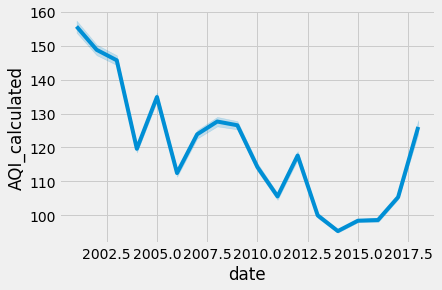

In [33]:
sns.lineplot(x=clean_df.groupby('date').median().index.year,
             y=clean_df.groupby('date').median()["AQI_calculated"])

In [34]:
aqi_data = clean_df['AQI_calculated']
aqi_data.head()

date
2001-08-01 01:00:00    107.0
2001-08-01 01:00:00    110.0
2001-08-01 01:00:00    110.0
2001-08-01 01:00:00    103.0
2001-08-01 01:00:00     99.0
Name: AQI_calculated, dtype: float64

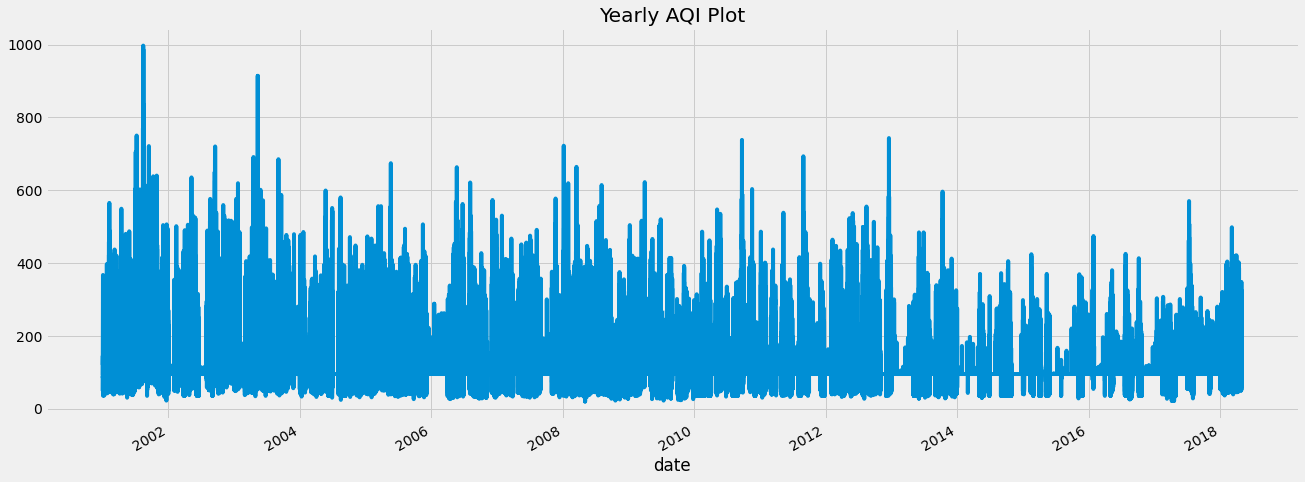

In [35]:
aqi_data.plot(grid=True, figsize=(20,8), title="Yearly AQI Plot")

The above graph shows the AQI distribution across the years

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


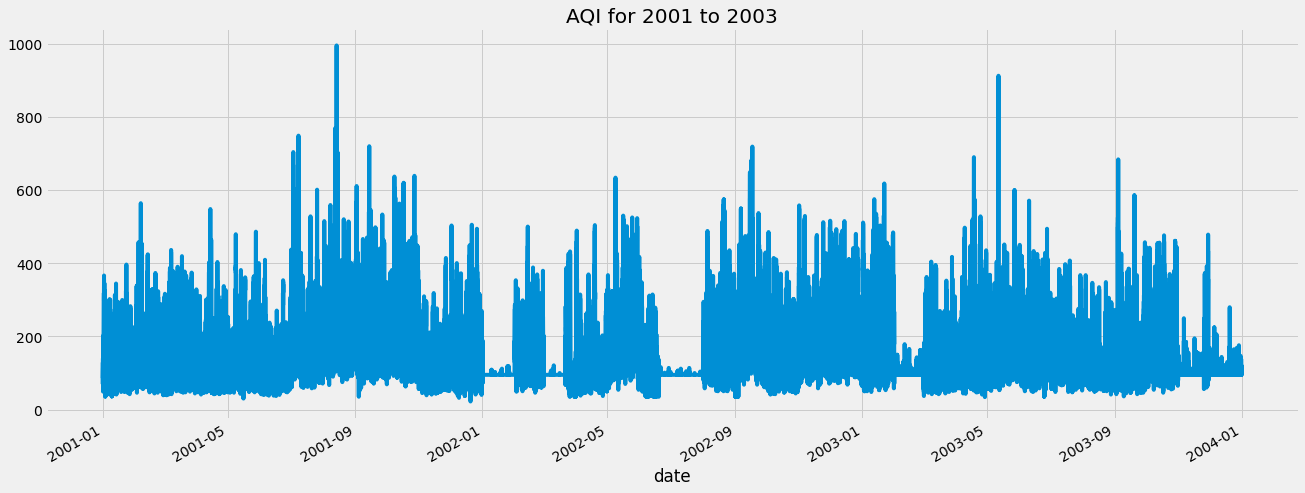

In [36]:
aqi_data.loc['2001':'2003'].plot(grid=True, figsize=(20,8), title="AQI for 2001 to 2003")

The above graph shows the AQI distribution across the from 2001 - 2003

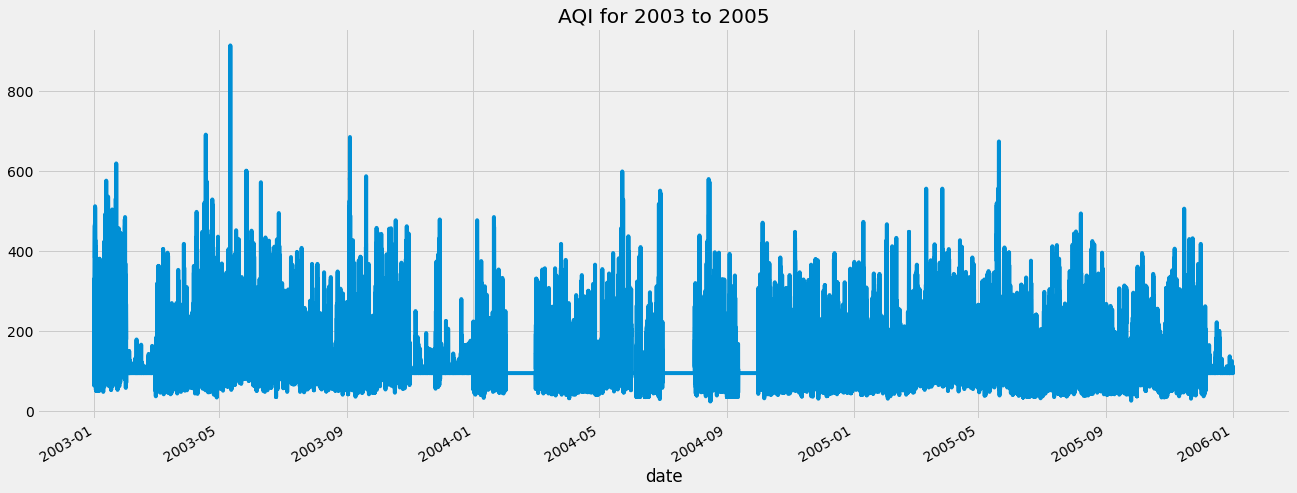

In [37]:
aqi_data.loc['2003':'2005'].plot(grid=True, figsize=(20,8), title="AQI for 2003 to 2005")

The above graph shows the AQI distribution across the from 2003 - 2005

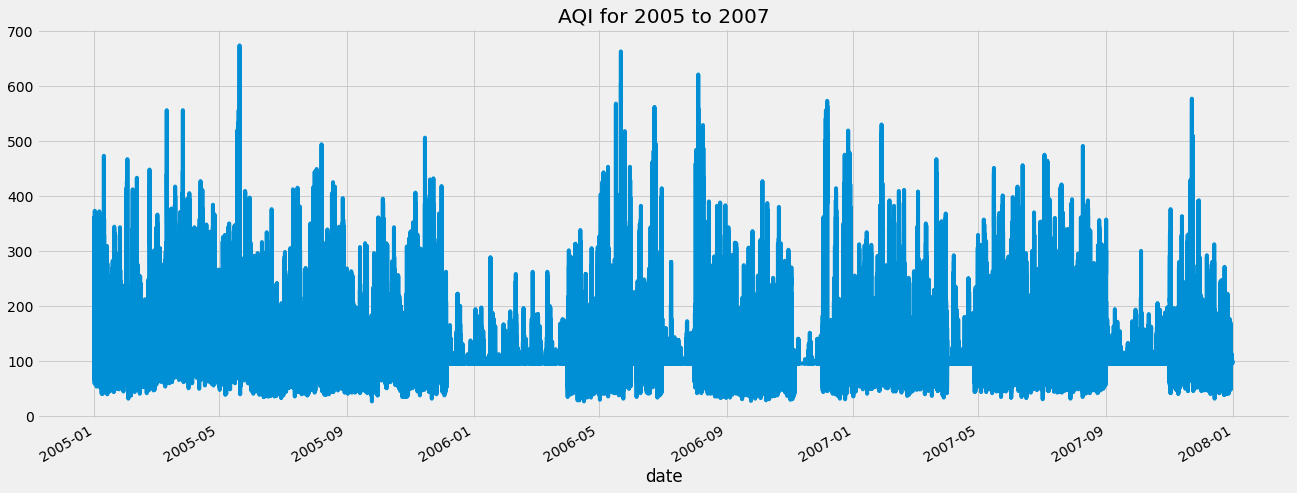

In [38]:
aqi_data.loc['2005':'2007'].plot(grid=True, figsize=(20,8), title="AQI for 2005 to 2007")

The above graph shows the AQI distribution across the from 2005 - 2007

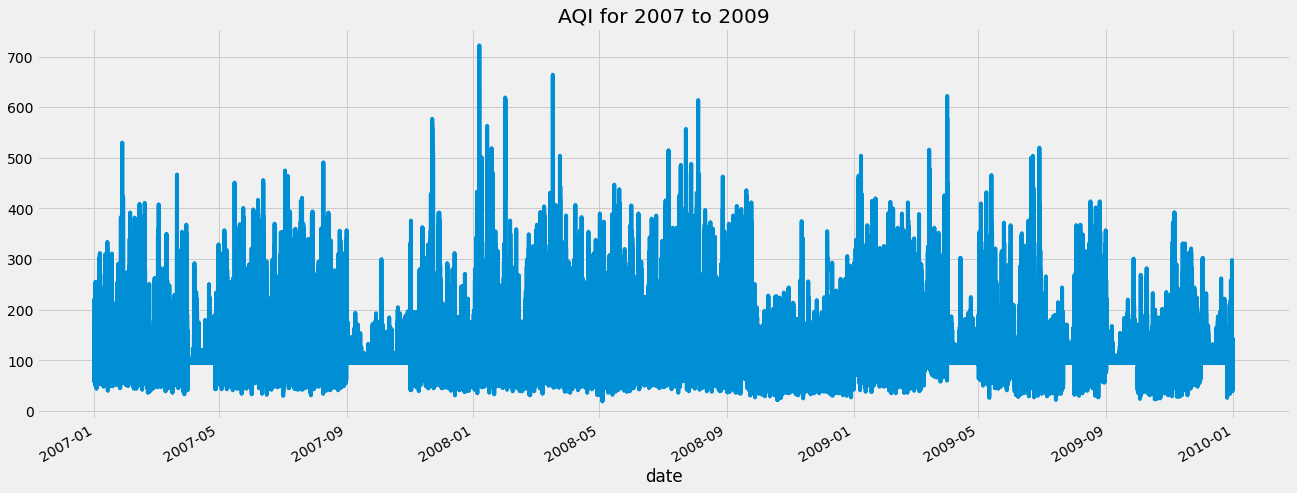

In [39]:
aqi_data.loc['2007':'2009'].plot(grid=True, figsize=(20,8), title="AQI for 2007 to 2009")

The above graph shows the AQI distribution across the from 2007 - 2009

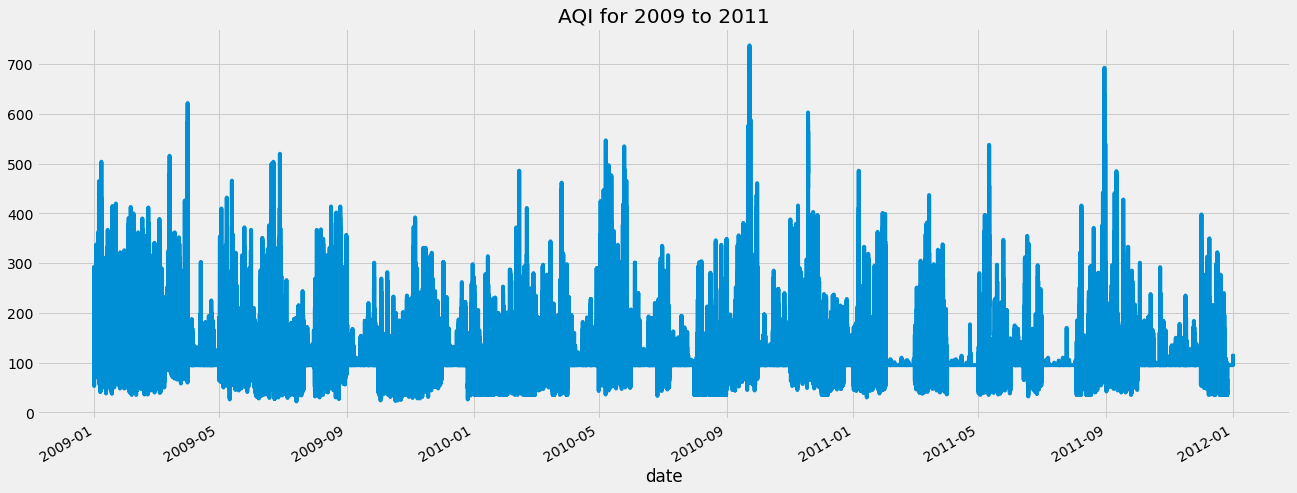

In [40]:
aqi_data.loc['2009':'2011'].plot(grid=True, figsize=(20,8), title="AQI for 2009 to 2011")

The above graph shows the AQI distribution across the from 2009 - 2011

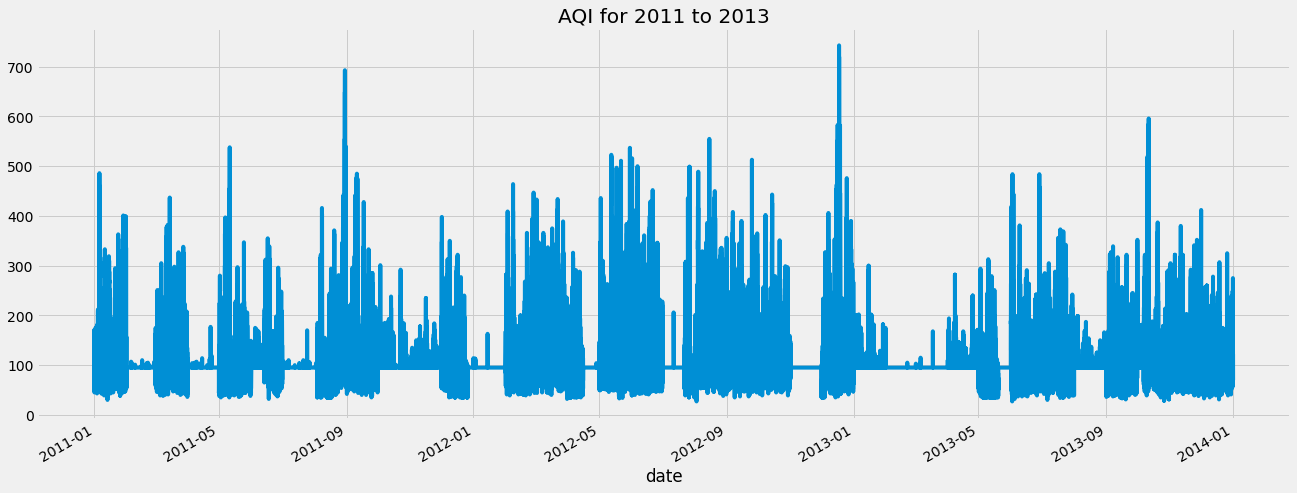

In [41]:
aqi_data.loc['2011':'2013'].plot(grid=True, figsize=(20,8), title="AQI for 2011 to 2013")

The above graph shows the AQI distribution across the from 2011 - 2013

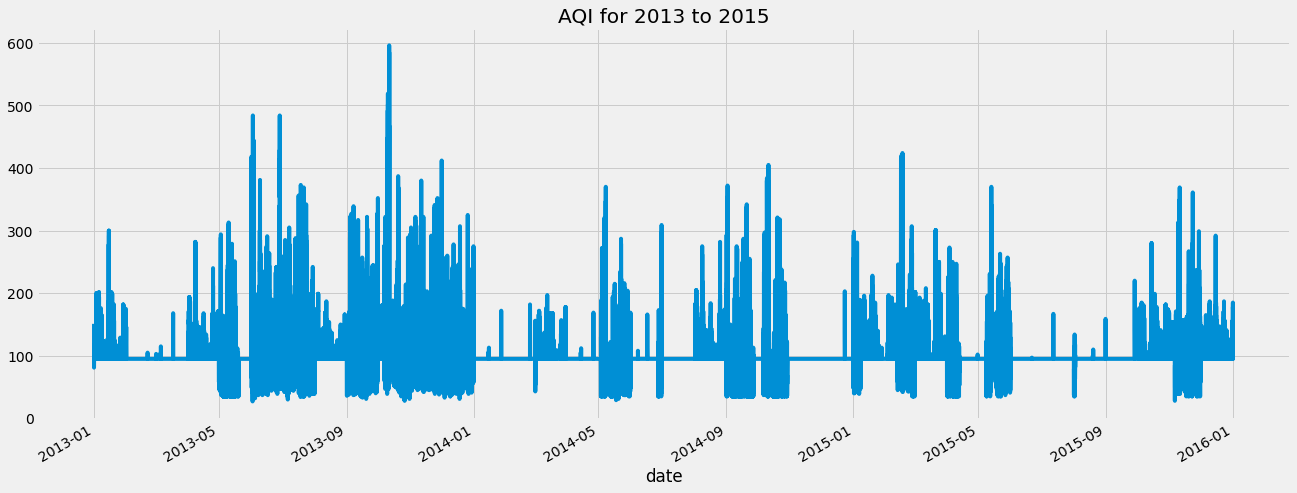

In [42]:

aqi_data.loc['2013':'2015'].plot(grid=True, figsize=(20,8), title="AQI for 2013 to 2015")

The above graph shows the AQI distribution across the from 2013 - 2015

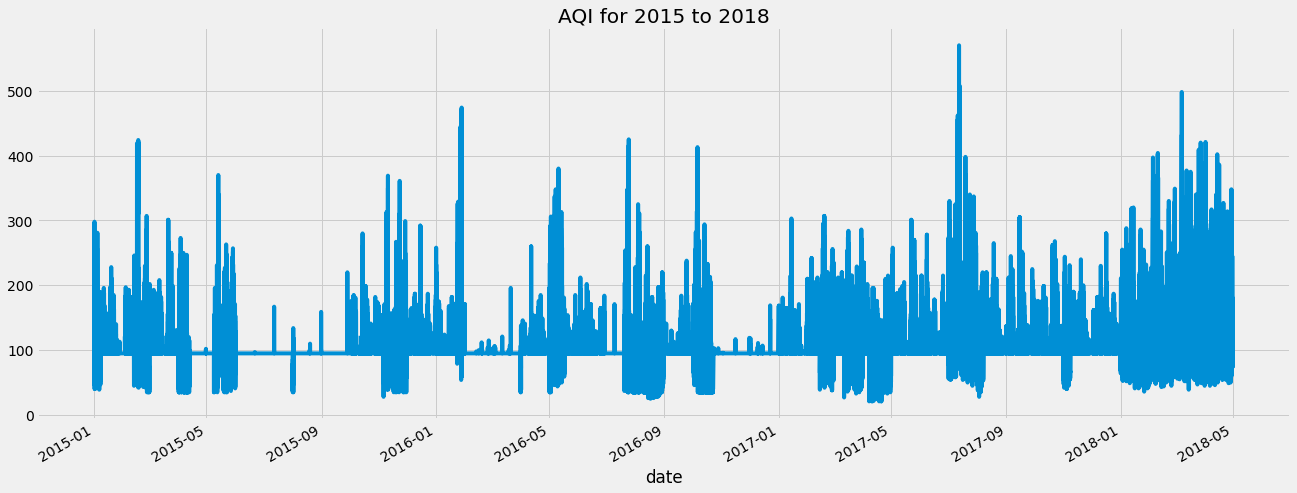

In [43]:
aqi_data.loc['2015':'2018'].plot(grid=True, figsize=(20,8), title="AQI for 2015 to 2018")

The above graph shows the AQI distribution across the from 2015 - 2018

We can notice a trend of highs and lows across the years, possibly at specific months, in the Air Quality Index. Let's look at some years to see when exactly these highs and lows occur.

In [44]:
import datetime 
from datetime import datetime

In [45]:
aqi_data_2012 = aqi_data['2012'].reset_index()
aqi_data_2013 = aqi_data['2013'].reset_index()
aqi_data_2012['m.d.hr'] = aqi_data_2012.date.map(lambda x: x.strftime('%m-%d-%H'))
aqi_data_2013['m.d.hr'] = aqi_data_2013.date.map(lambda x: x.strftime('%m-%d-%H'))

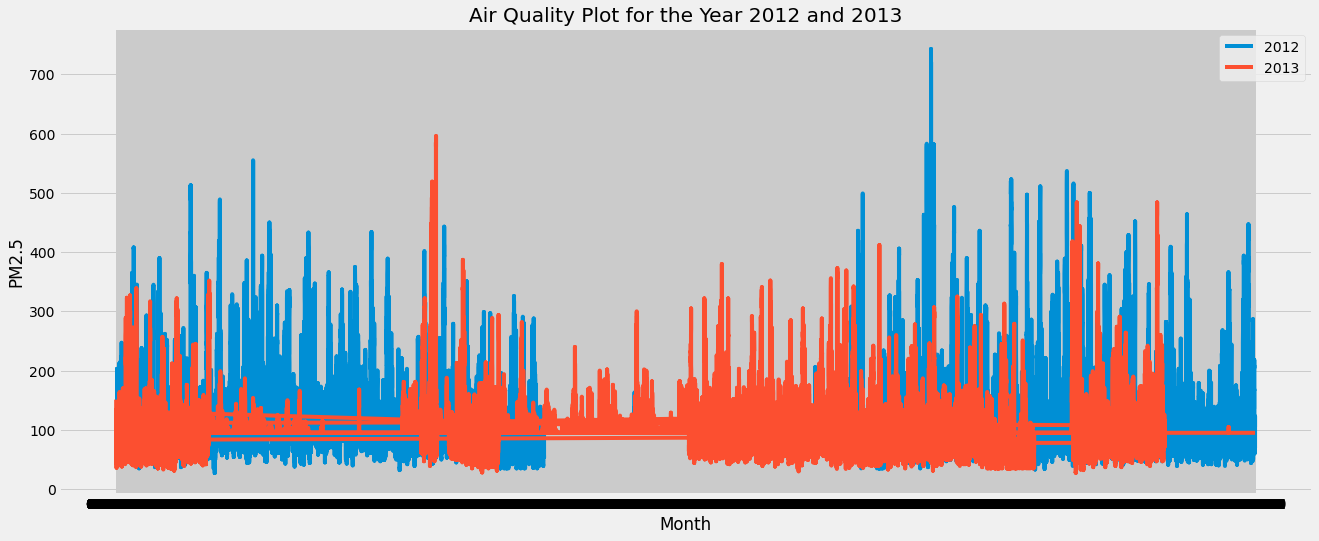

In [46]:
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(aqi_data_2012['m.d.hr'], aqi_data_2012['AQI_calculated'])
plt.plot(aqi_data_2013['m.d.hr'], aqi_data_2013['AQI_calculated'])
plt.legend(['2012','2013'])
plt.xlabel("Month")
plt.ylabel('PM2.5')
plt.title('Air Quality Plot for the Year 2012 and 2013')
plt.show()

In [47]:
# ## I am trying to do a plot showing the AQI for each station
# # groupby product
# stations = clean_df.groupby(["station","date"])

# plt.figure(figsize=(20, 8), dpi=150)

# # print product and corresponding product df
# for stat, stat_df in stations:
#     stat_df['AQI_calculated'].plot(label=stat)

# plt.xlabel('AQI Calculate')
# plt.legend()
# plt.show()

### Visualization of other Variables

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f65c5b15a10>,
      dtype=object)

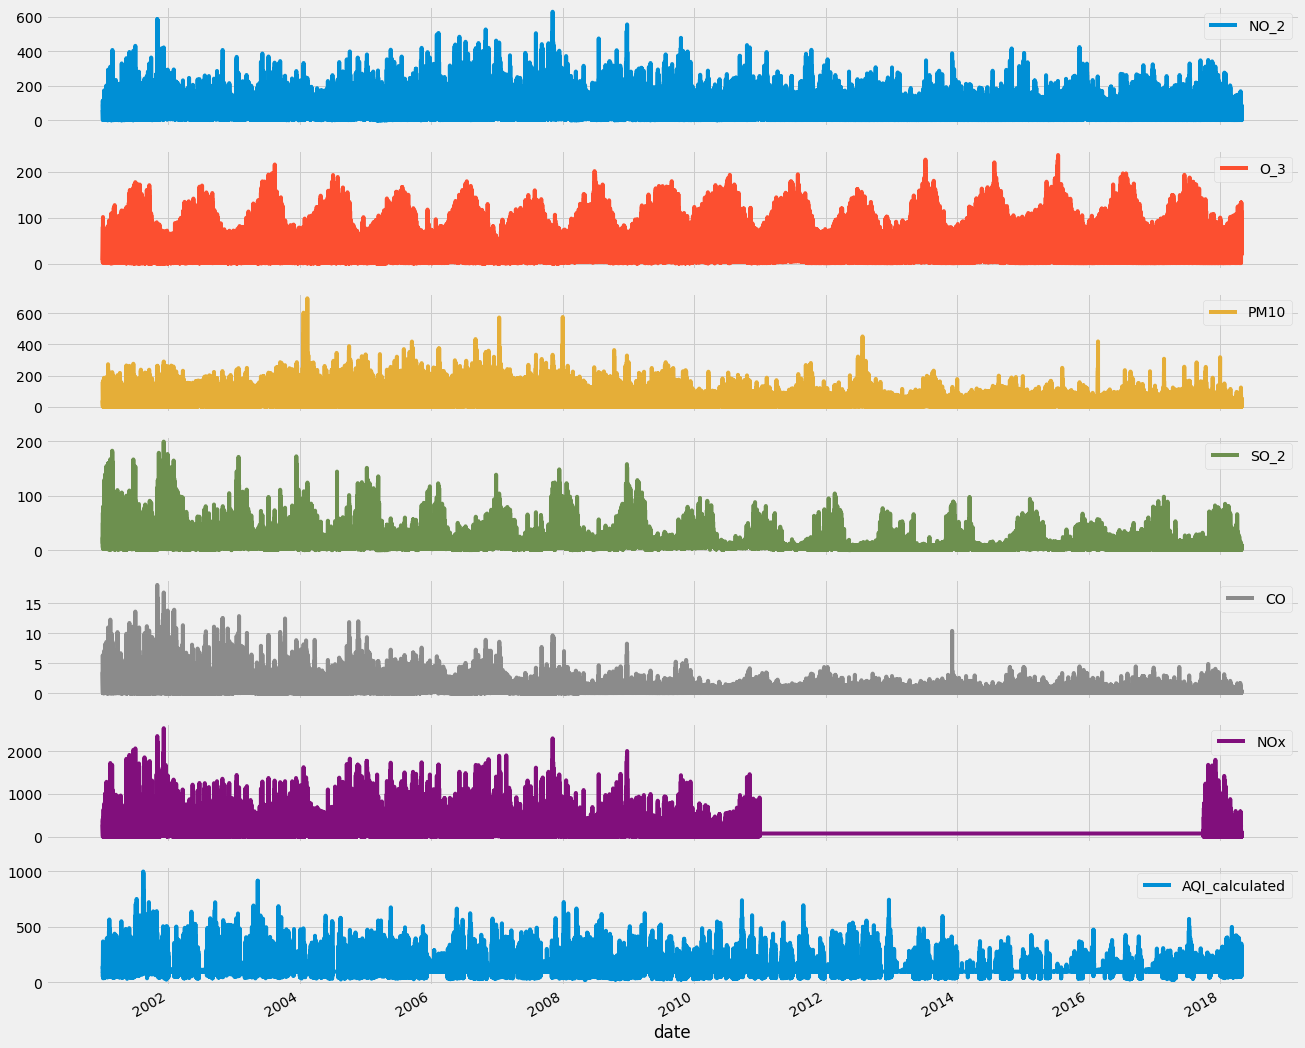

In [ ]:
multi_data = clean_df[['NO_2', 'O_3', 'PM10', 'SO_2', 'CO', 'NOx']]
multi_data.plot(subplots=True, figsize=(20,20))

## Training a prediction model

In [48]:
x = clean_df.drop('AQI_calculated', axis = 1).values
y = clean_df.loc[:, 'AQI_calculated'].values

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [51]:
prediction = model.predict(x_test)

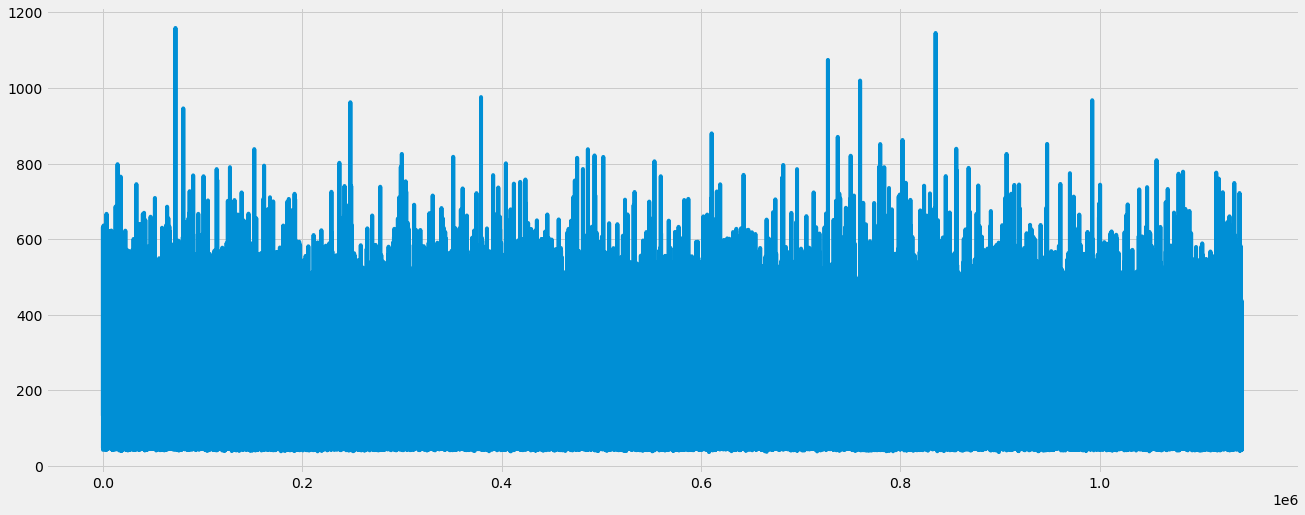

In [ ]:
prediction.plot(subplots=True, figsize=(10,5))

The Above graph is a forecast of the Air Quality Index of times to come as the plotted values are gotten from the prediction of the trained model